## Analysing human behaviour: accuracy

This notebook reproduces accuracy ANOVAs from the section _Visual manipulations trigger recurrent processing_.

In [2]:
## Preamble

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
import scikit_posthocs as sp

# define some labels & colours
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']
manipulations = {
    'control': 'Control',
    'clutter': 'Clutter',
    'occlusion': 'Occlusion',
    'scrambling': 'Phase scrambling',
}
mask_palette = {
    'no mask': '#1670B0',
    'mask': '#DA8F2B'
}

In [3]:
# read the data
df = pd.read_csv('../data/human_data.csv')

### Two-way ANOVA on accuracy

Here we check whether accuracy levels significantly vary across levels of *manipulation* and *masking*.

In [4]:
# create a general anova df with aggregated accuracy per condition, masking and subject
gen_aovdf = df.groupby(['subj', 'manipulation', 'mask'], as_index=False)['acc'].mean()

# run a least square anova based on the model formula
formula = 'acc ~ C(mask) + C(manipulation) + C(mask):C(manipulation)'
model = ols(formula, gen_aovdf).fit()
print(sm.stats.anova_lm(model, typ=2))

                           sum_sq     df           F        PR(>F)
C(mask)                  0.109575    1.0   50.445423  6.270836e-12
C(manipulation)          1.306737    3.0  200.529160  2.330796e-77
C(mask):C(manipulation)  0.085209    3.0   13.075949  3.891369e-08
Residual                 0.808039  372.0         NaN           NaN


**Post-hoc analyses**: which manipulations significantly differ from the others?

In [5]:
# run posthoc tests on the general anova df with Bonferroni correction
gen_posthoc = pd.DataFrame(sp.posthoc_ttest(gen_aovdf, val_col='acc', group_col='manipulation', p_adjust='bonferroni'))
print(gen_posthoc)

               occlusion       clutter       control    scrambling
occlusion   1.000000e+00  1.371602e-19  3.598664e-25  2.000432e-16
clutter     1.371602e-19  1.000000e+00  1.000000e+00  4.165060e-35
control     3.598664e-25  1.000000e+00  1.000000e+00  2.803054e-41
scrambling  2.000432e-16  4.165060e-35  2.803054e-41  1.000000e+00


### Manipulation-specific two-way ANOVAs

Having established an interaction effect between masking and manipulation, we look into manipulation difficulty and masking within each manipulation (_clutter_, _occlusion_, _phase scrambling_).

**Clutter**: two-way ANOVA on accuracy with manipulation difficulty (_light clutter_, _heavy clutter_) and masking as factors.

In [6]:
# make the appropriate clutter-specific dataframe with collected responses
clut_aovdf = df.loc[df['manipulation'].isin(['clutter'])].groupby(['subj', 'difficulty', 'mask'], as_index=False)['acc'].mean()

# run an ordinary least squares anova on accuracy
formula = 'acc ~ C(mask) + C(difficulty) + C(mask):C(difficulty)'
model = ols(formula, clut_aovdf).fit()
print('2-way ANOVA on phase clutter accuracy \n', sm.stats.anova_lm(model, typ=2))

# run posthoc tests across levels of difficulty and masking
diff_clut_posthoc = sp.posthoc_ttest(clut_aovdf, val_col='acc', group_col='difficulty', p_adjust='bonferroni')
mask_clut_posthoc = sp.posthoc_ttest(clut_aovdf, val_col='acc', group_col='mask', p_adjust='bonferroni')
print('\nPosthoc comparisons across levels of difficulty \n', diff_clut_posthoc, '\n\nPosthoc comparisons across levels of masking \n', mask_clut_posthoc)

2-way ANOVA on phase clutter accuracy 
                          sum_sq     df         F    PR(>F)
C(mask)                0.002168    1.0  1.396647  0.239181
C(difficulty)          0.000002    1.0  0.001534  0.968815
C(mask):C(difficulty)  0.001219    1.0  0.785174  0.377001
Residual               0.229758  148.0       NaN       NaN

Posthoc comparisons across levels of difficulty 
           heavy     light
heavy  1.000000  0.968833
light  0.968833  1.000000 

Posthoc comparisons across levels of masking 
              mask   no mask
mask     1.000000  0.237259
no mask  0.237259  1.000000


**Occlusion**: two-way ANOVA on accuracy with manipulation difficulty (_low occlusion_, _high occlusion_) and masking as factors.

In [7]:
# make the appropriate occlusion-specific dataframe with collected responses
occ_aovdf = df.loc[df['manipulation'].isin(['occlusion'])].groupby(['subj', 'difficulty', 'mask'], as_index=False)['acc'].mean()

# run an ordinary least squares anova on accuracy
formula = 'acc ~ C(mask) + C(difficulty) + C(mask):C(difficulty)'
model = ols(formula, occ_aovdf).fit()
print('2-way ANOVA on occlusion accuracy \n', sm.stats.anova_lm(model, typ=2))

# run poshoc tests across levels of difficulty and masking
diff_occ_posthoc = sp.posthoc_ttest(occ_aovdf, val_col='acc', group_col='difficulty', p_adjust='bonferroni')
mask_occ_posthoc = sp.posthoc_ttest(occ_aovdf, val_col='acc', group_col='mask', p_adjust='bonferroni')
print('\nPosthoc comparisons across levels of difficulty \n', diff_occ_posthoc, '\n\nPosthoc comparisons across levels of masking \n', mask_occ_posthoc)

2-way ANOVA on occlusion accuracy 
                          sum_sq     df           F        PR(>F)
C(mask)                0.143389    1.0   43.454107  2.151787e-10
C(difficulty)          0.875389    1.0  265.286808  2.029752e-42
C(mask):C(difficulty)  0.078970    1.0   23.931749  1.686126e-06
Residual               0.923939  280.0         NaN           NaN

Posthoc comparisons across levels of difficulty 
               high           low
high  1.000000e+00  1.292702e-36
low   1.292702e-36  1.000000e+00 

Posthoc comparisons across levels of masking 
           no mask      mask
no mask  1.000000  0.000005
mask     0.000005  1.000000


**Phase scrambling**: two-way ANOVA on accuracy with manipulation difficulty (_low pass_, _high pass_) and masking as factors.

In [8]:
# make the appropriate phase scrambling-specific dataframe with collected responses
scr_aovdf = df.loc[df['manipulation'].isin(['scrambling'])].groupby(['subj', 'difficulty', 'mask'], as_index=False)['acc'].mean()

# run an ordinary least squares anova on accuracy
formula = 'acc ~ C(mask) + C(difficulty) + C(mask):C(difficulty)'
model = ols(formula, scr_aovdf).fit()
print('2-way ANOVA on phase scrambling accuracy \n', sm.stats.anova_lm(model, typ=2))

# run posthoc tests across levels of difficulty and masking
diff_scr_posthoc = sp.posthoc_ttest(scr_aovdf, val_col='acc', group_col='difficulty', p_adjust='bonferroni')
mask_scr_posthoc = sp.posthoc_ttest(scr_aovdf, val_col='acc', group_col='mask', p_adjust='bonferroni')
print('\nPosthoc comparisons across levels of difficulty \n', diff_scr_posthoc, '\n\nPosthoc comparisons across levels of masking \n', mask_scr_posthoc)

2-way ANOVA on phase scrambling accuracy 
                          sum_sq     df           F        PR(>F)
C(mask)                0.248335    1.0   45.069705  3.797249e-10
C(difficulty)          3.694729    1.0  670.546952  7.814243e-57
C(mask):C(difficulty)  0.186138    1.0   33.781642  3.650023e-08
Residual               0.815483  148.0         NaN           NaN

Posthoc comparisons across levels of difficulty 
               highpass       lowpass
highpass  1.000000e+00  1.208360e-46
lowpass   1.208360e-46  1.000000e+00 

Posthoc comparisons across levels of masking 
              mask   no mask
mask     1.000000  0.005511
no mask  0.005511  1.000000


### Plot

This section reproduces the plots linked to human accuracy analyses.

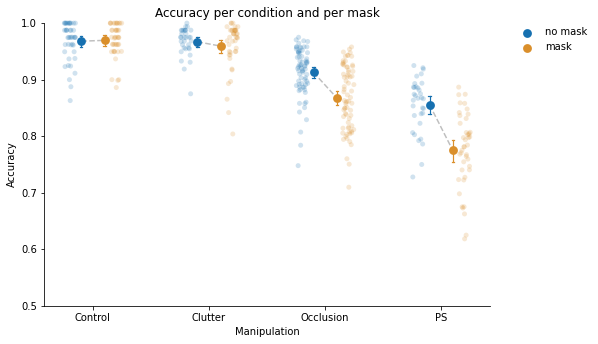

In [28]:
### GENERAL ANOVA PLOT

fig, axes = plt.subplots(1, 1, figsize = (8.0, 5.2))

# make the point plot
gen_plot = sns.pointplot(
    data = gen_aovdf,
    x = 'manipulation',
    y = 'acc',
    hue = 'mask',
    dodge = 0.2,
    join = False,
    hue_order = ['no mask', 'mask'],
    order = manipulations.keys(),
    palette = mask_palette,
    errwidth = 1.2,
    capsize = 0.02,
    ax = axes
)
# add individual data points
gen_ind_plot = sns.stripplot(
    data = gen_aovdf,
    x = 'manipulation',
    y = 'acc', 
    hue = 'mask',
    alpha = 0.2,
    order = manipulations.keys(),
    hue_order = ['no mask', 'mask'],
    palette = mask_palette,
    ax = axes,
    dodge = 0.2,
    clip_on=False,
)
# set the y axis range
plt.ylim(0.5, 1)
# set the labels
gen_ind_plot.set(xlabel = 'Manipulation', ylabel = 'Accuracy')
gen_ind_plot.set_xticklabels(['Control', 'Clutter','Occlusion', 'PS'])
# link the average datapoints
for (x0, y0), (x1, y1) in zip(axes.collections[0].get_offsets(), axes.collections[1].get_offsets()):
    axes.plot([x0, x1], [y0, y1], color='gray', ls='--', zorder=0, alpha = 0.5)
# give a title to the plot
plt.title('Accuracy per condition and per mask')
# keep only one legend
handles, labels = axes.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon = False)
# remove the top and left frame
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)